In [19]:
import networkx as nx
import matplotlib.pyplot as plt

Prepare the DAG

In [12]:
# Create a Directed Acyclic Graph
dag = nx.DiGraph()

# Add nodes and edges to represent the relationships
dag.add_edges_from([
    ("PredatorExperience", "PredatorBehavior"),
    ("PredatorBehavior", "PreyBehavior"),
    ("PredatorExperience", "PreyBehavior"),
])

# Specify the positions of nodes to control arrow length
pos = {
    "PredatorExperience": (0, 0),
    "PredatorBehavior": (1, 0),
    "PreyBehavior": (2, 0)
}

# Define XKCD color RGB values
xkcd_colors = {
    "kelly green": "#02ab2e",
    "grass green": "#3f9b0b",
    "medium green": "#39ad48",
}

Draw the DAG

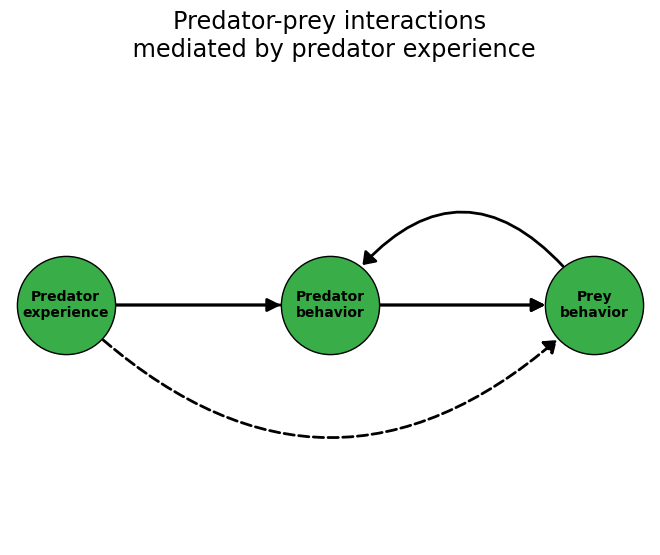

In [21]:
# Draw the solid edges
nx.draw(
    dag, pos,
    with_labels = True,
    labels = {
        "PredatorExperience": "Predator\nexperience",
        "PredatorBehavior": "Predator\nbehavior",
        "PreyBehavior": "Prey\nbehavior"
    },
    font_weight = "bold",
    font_size = 10,
    node_size = 5000,
    node_color = xkcd_colors["medium green"],
    edgecolors = "black",
    arrowsize = 20,
    arrowstyle = "-|>",
    width = 2,
    style = "solid",
)

# Draw the curved dashed arrow with adjusted length
start_pos = pos["PredatorExperience"]
end_pos = pos["PreyBehavior"]

# Draw curved dashed arrow with curvature using annotate
plt.annotate(
    "", xy = end_pos, xytext = start_pos,
    arrowprops = dict(
        arrowstyle = "-|>, head_width = 0.5, head_length = 0.7",
        linestyle = "dashed", color = "black",
        # Adjust the rad value as needed for curvature
        connectionstyle = "arc3,rad = 0.5",
        # Adjust the fractions to shorten the start and end of the arrow
        shrinkA = 37,
        shrinkB = 37,
        linewidth = 2,
    ),
    annotation_clip = False
)

# Draw the curved solid arrow with curvature
start_pos_solid = pos["PreyBehavior"]
end_pos_solid = pos["PredatorBehavior"]

plt.annotate(
    "", xy = end_pos_solid, xytext = start_pos_solid,
    arrowprops = dict(
        arrowstyle = "-|>, head_width = 0.5, head_length = 0.7",
        linestyle = "solid", color = "black",
        connectionstyle = "arc3,rad = 0.7",
        shrinkA = 36,
        shrinkB = 37,
        linewidth = 2,
    ),
    annotation_clip = False
)

# Save the plot
plt.savefig("predator-prey_dag.png", format = "png", bbox_inches = "tight")

# Display plot
plt.title(
    "Predator-prey interactions\n mediated by predator experience",
    fontsize = "xx-large")
plt.show()